In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
# import time
import matplotlib.pyplot as plt
# from PIL import Image
# from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:
data_dir = './dataset/'
batch_size = 32
img_height = 256
img_width = 256
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

ds_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_ds = ds_generator.flow_from_directory(
    data_dir,
    seed=SEED,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_ds = ds_generator.flow_from_directory(
    data_dir,
    seed=SEED,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [28]:
# Checking that the different classes

class_names = train_ds.class_indices
print(class_names)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


First we try an SGD setup with dropout

In [40]:
num_classes = 4

def create_cnn_model(input_shape=(256, 256, 3), learning_rate=0.01, momentum=0.9):
    # Build the model
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()


In [41]:
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4735 - loss: 1.0124 - val_accuracy: 0.5293 - val_loss: 0.7638
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.6166 - loss: 0.6846 - val_accuracy: 0.5817 - val_loss: 0.6612
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.6504 - loss: 0.6351 - val_accuracy: 0.6341 - val_loss: 0.6188
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.6657 - loss: 0.5697 - val_accuracy: 0.6581 - val_loss: 0.5642
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.6666 - loss: 0.6088 - val_accuracy: 0.6936 - val_loss: 0.5099
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.6997 - loss: 0.5105 - val_accuracy: 0.6581 - val_loss: 0.5364
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7113 - loss: 0.5144 - val_accuracy: 0.7202 - val_loss: 0.5363
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7328 - loss: 0.5183 - 

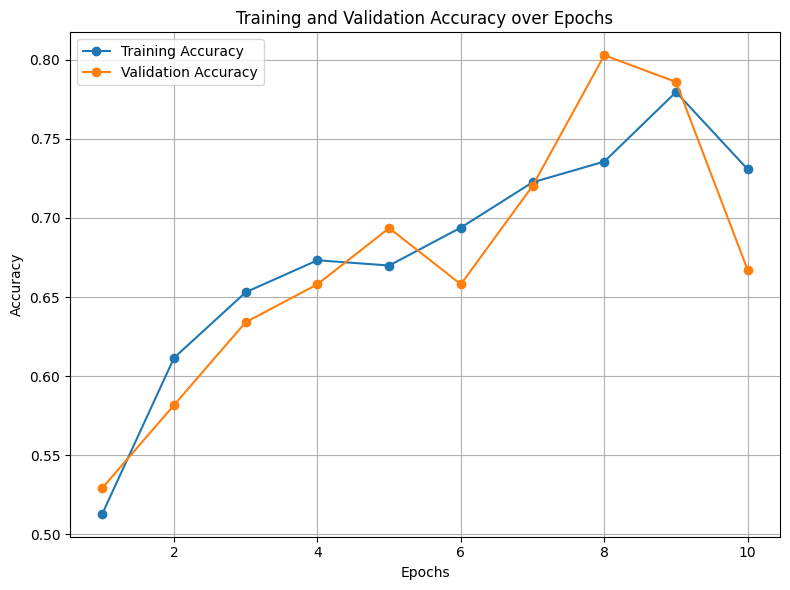

In [42]:
# Extract accuracy and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The we try an SGD setup without drop-out

In [34]:
num_classes = 4

def create_cnn_model(input_shape=(256, 256, 3), learning_rate=0.01, momentum=0.9):
    # Build the model
    model = Sequential()    
    # Convolutional layers
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,348 (12.62 MB)

 Trainable params: 3,309,348 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 32s 183ms/step - accuracy: 0.4916 - loss: 1.0645 - val_accuracy: 0.6119 - val_loss: 0.6648
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.6112 - loss: 0.6733 - val_accuracy: 0.6723 - val_loss: 0.5446
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.6391 - loss: 0.6440 - val_accuracy: 0.6936 - val_loss: 0.5072
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.6672 - loss: 0.5660 - val_accuracy: 0.5782 - val_loss: 0.8252
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.6480 - loss: 0.6076 - val_accuracy: 0.6758 - val_loss: 0.5542
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.6670 - loss: 0.5583 - val_accuracy: 0.6625 - val_loss: 0.5230
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.6668 - loss: 0.5213 - val_accuracy: 0.6918 - val_loss: 0.4829
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.6881 - loss: 0.4966 

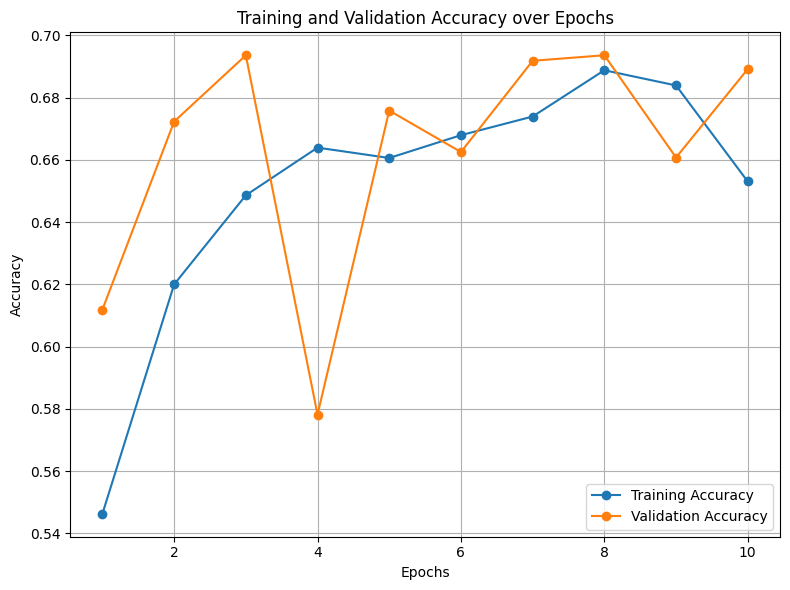

In [36]:
# Extract accuracy and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As the dropout results are better we will continue with dropout.

In [43]:
def create_cnn_model(input_shape=(256, 256, 3), learning_rate=0.01, momentum=0.9):
    # Build the model
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()

In [44]:
# Exploring the best parameters for the SGD algorithm

# Define the parameter grid
learning_rates = [0.001, 0.002, 0.01, 0.1]
momentum_values = [0.8, 0.9, 0.95, 0.99]

# Prepare results storage
results = []

# Iterate over all combinations of learning rates and momentum
for lr in learning_rates:
    for momentum in momentum_values:
        print(f"Training with learning_rate={lr} and momentum={momentum}")
        
        # Define the model (simple example)
        model = create_cnn_model(learning_rate=lr, momentum=momentum)
        
        # Train the model
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=5,  # Use fewer epochs for quick experimentation
            verbose=0  # Set to 1 if you want to see training output
        )
        
        # Record the final validation accuracy
        final_val_acc = history.history['val_accuracy'][-1]
        results.append({'learning_rate': lr, 'momentum': momentum, 'val_accuracy': final_val_acc})

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

# Sort and display the top configurations
top_results = results_df.sort_values(by='val_accuracy', ascending=False).head(5)
print("Top configurations:")
print(top_results)

Training with learning_rate=0.001 and momentum=0.8
Training with learning_rate=0.001 and momentum=0.9
Training with learning_rate=0.001 and momentum=0.95
Training with learning_rate=0.001 and momentum=0.99
Training with learning_rate=0.002 and momentum=0.8
Training with learning_rate=0.002 and momentum=0.9
Training with learning_rate=0.002 and momentum=0.95
Training with learning_rate=0.002 and momentum=0.99
Training with learning_rate=0.01 and momentum=0.8
Training with learning_rate=0.01 and momentum=0.9
Training with learning_rate=0.01 and momentum=0.95
Training with learning_rate=0.01 and momentum=0.99
Training with learning_rate=0.1 and momentum=0.8
Training with learning_rate=0.1 and momentum=0.9
Training with learning_rate=0.1 and momentum=0.95
Training with learning_rate=0.1 and momentum=0.99
    learning_rate  momentum  val_accuracy
0           0.001      0.80      0.791297
1           0.001      0.90      0.686501
2           0.001      0.95      0.853464
3           0.001   

In [45]:
# Exploring the best parameters for the SGD algorithm - using more epochs but less parameter values

# Define the parameter grid
learning_rates = [0.001, 0.002]
momentum_values = [0.8, 0.9, 0.95]

# Prepare results storage
results = []

# Iterate over all combinations of learning rates and momentum
for lr in learning_rates:
    for momentum in momentum_values:
        print(f"Training with learning_rate={lr} and momentum={momentum}")
        
        # Define the model (simple example)
        model = create_cnn_model(learning_rate=lr, momentum=momentum)
        
        # Train the model
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=10,  # Use fewer epochs for quick experimentation
            verbose=0  # Set to 1 if you want to see training output
        )
        
        # Record the final validation accuracy
        final_val_acc = history.history['val_accuracy'][-1]
        results.append({'learning_rate': lr, 'momentum': momentum, 'val_accuracy': final_val_acc})

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

# Sort and display the top configurations
top_results = results_df.sort_values(by='val_accuracy', ascending=False).head(5)
print("Top configurations:")
print(top_results)

Training with learning_rate=0.001 and momentum=0.8


/home/freillat/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with learning_rate=0.001 and momentum=0.9
Training with learning_rate=0.001 and momentum=0.95
Training with learning_rate=0.002 and momentum=0.8
Training with learning_rate=0.002 and momentum=0.9
Training with learning_rate=0.002 and momentum=0.95
   learning_rate  momentum  val_accuracy
0          0.001      0.80      0.841030
1          0.001      0.90      0.820604
2          0.001      0.95      0.880107
3          0.002      0.80      0.775311
4          0.002      0.90      0.872114
5          0.002      0.95      0.705151
Top configurations:
   learning_rate  momentum  val_accuracy
2          0.001      0.95      0.880107
4          0.002      0.90      0.872114
0          0.001      0.80      0.841030
1          0.001      0.90      0.820604
3          0.002      0.80      0.775311


Now we train using more epochs on best parameters found so far

In [46]:
cnn_model = create_cnn_model(learning_rate=0.001, momentum=0.95)

/home/freillat/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4403 - loss: 1.1483 - val_accuracy: 0.7389 - val_loss: 0.5383
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.6770 - loss: 0.6009 - val_accuracy: 0.7647 - val_loss: 0.4640
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7152 - loss: 0.5243 - val_accuracy: 0.6794 - val_loss: 0.6488
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7245 - loss: 0.5693 - val_accuracy: 0.7869 - val_loss: 0.4425
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7986 - loss: 0.4587 - val_accuracy: 0.8268 - val_loss: 0.3815
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7792 - loss: 0.5045 - val_accuracy: 0.8703 - val_loss: 0.3255
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8431 - loss: 0.3960 - val_accuracy: 0.6954 - val_loss: 0.6356
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.8207 - loss: 0.4436 - val_ac

We will compare this last model with one creating using the adam optimizer

In [51]:
def create_cnn_adam_model(input_shape=(256, 256, 3)):
    # Build the model
    model = Sequential()    
    # Convolutional layers
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer='adam'
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_adam_model = create_cnn_adam_model()


In [52]:
history = cnn_adam_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.6692 - loss: 0.6667 - val_accuracy: 0.8162 - val_loss: 0.4618
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8329 - loss: 0.4090 - val_accuracy: 0.8366 - val_loss: 0.4165
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8609 - loss: 0.3421 - val_accuracy: 0.8694 - val_loss: 0.3052
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8828 - loss: 0.3120 - val_accuracy: 0.8641 - val_loss: 0.3510
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8904 - loss: 0.2793 - val_accuracy: 0.8659 - val_loss: 0.3070
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8635 - loss: 0.3260 - val_accuracy: 0.8819 - val_loss: 0.3532
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8465 - loss: 0.3782 - val_accuracy: 0.8215 - val_loss: 0.3445
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8901 - loss: 0.2691 - val_acc

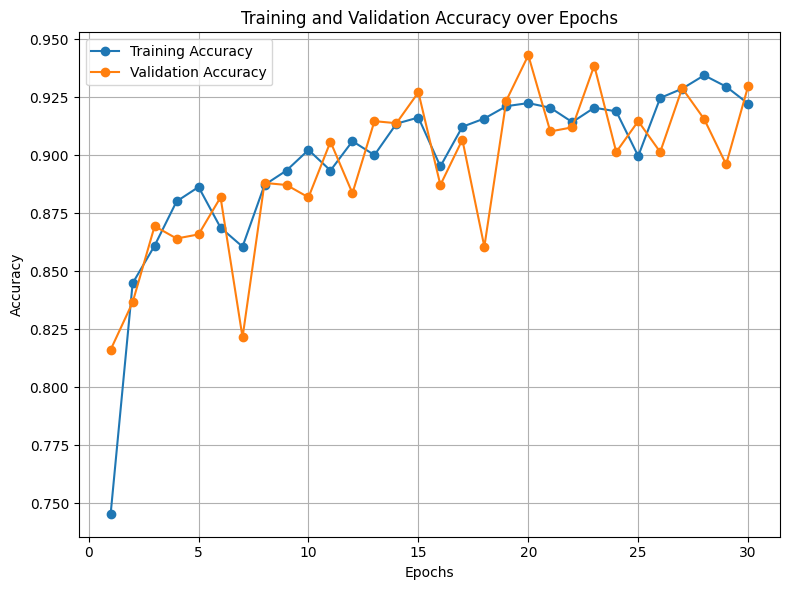

In [53]:
# Extract accuracy and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using the adam optimizer leads to the best results, even better than the fine-tuned sgd so we will use this for implementation. As a side note it also gets there much quicker.